## Testing Method 
---

In [1]:
import crowded.simulate as cs
import crowded.method as cm
from pycm import *

#### Simulate the tasks

In [2]:
total_tasks = 415 
p_hard_tasks = 0.4
number_of_valid_answers = 5
df_tasks = cs.Tasks(number_of_valid_answers).create(total_tasks, p_hard_tasks)
df_tasks.head()

,task_id,true_answers,label_task,prob_task
id,,,,
task_7pakEYVW65fP,task_7pakEYVW65fP,curve,easy_task,0.83
task_pRJZNMaMFqG4,task_pRJZNMaMFqG4,arc,hard_task,0.14
task_3usg497mHz3X,task_3usg497mHz3X,biases,easy_task,0.93
task_QGyCAiUQqnnv,task_QGyCAiUQqnnv,curve,easy_task,0.57
task_KF8zNhGNRc7b,task_KF8zNhGNRc7b,arc,easy_task,0.56


#### Simulate the workers

In [3]:
total_workers = 40 #50 #30
workers = cs.Workers().create(total_workers)
workers.head()

,prob_worker,worker_id
id,,
ygGfzwWiBAYh,0.934760,ygGfzwWiBAYh
opxgSEdSfjF9,0.903603,opxgSEdSfjF9
i6WwJQjBprFo,0.895851,i6WwJQjBprFo
MQtfcjm74bYM,0.930487,MQtfcjm74bYM
K99ufooS9PFL,0.922409,K99ufooS9PFL


#### Split the tasks

In [4]:
#Tasks Split
PTT = .3
def tasks_split(df, p = PTT):
    _train = df.sample(frac=p, random_state=23)
    _rest = df.loc[df.index.difference(_train.index)]
    return _train, _rest

In [5]:
tasks_train, tasks_rest = tasks_split(df_tasks, .3)

#### Assigning workers to tasks

In [6]:
wpt = 5
#workers per task always smaller than the number of workers
df_tw = cs.AssignTasks(tasks_train, workers, wpt).create()
df_tw.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker
0,task_A653eUxUnDjM,abnKn3hMDavQ,biases,easy_task,0.6,0.890812
1,task_A653eUxUnDjM,9gax3iZjTxZH,biases,easy_task,0.6,0.865034
2,task_A653eUxUnDjM,79HeATJwVHee,biases,easy_task,0.6,0.861028
3,task_A653eUxUnDjM,unvPfM9LeD6X,biases,easy_task,0.6,0.968507
4,task_A653eUxUnDjM,MQtfcjm74bYM,biases,easy_task,0.6,0.930487


#### Compute the probability to assess the tasks

In [7]:
keys = df_tasks['true_answers'].unique()
keys

array(['curve', 'arc', 'biases', 'detail', 'energy'], dtype=object)

In [8]:
cp = cm.ComputeProbability(df_tw['prob_task'], df_tw['prob_worker'], keys)
df_tw['worker_answers'] = cm.WorkerAnswer(df_tw['true_answers'], cp.predict(), keys).match()
df_tw['performance'] = cp.predict()
df_tw.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker,worker_answers,performance
0,task_A653eUxUnDjM,abnKn3hMDavQ,biases,easy_task,0.6,0.890812,biases,1
1,task_A653eUxUnDjM,9gax3iZjTxZH,biases,easy_task,0.6,0.865034,biases,1
2,task_A653eUxUnDjM,79HeATJwVHee,biases,easy_task,0.6,0.861028,biases,1
3,task_A653eUxUnDjM,unvPfM9LeD6X,biases,easy_task,0.6,0.968507,biases,1
4,task_A653eUxUnDjM,MQtfcjm74bYM,biases,easy_task,0.6,0.930487,biases,1


#### Assess the performance and get the good workers

In [9]:
perf = cm.Performance(df_tw)
df_workers = perf._workers()
df_workers.head()

,worker_id,prob_task,prob_worker,performance,worker_ability,task_id
0,3XTg88TdcFyC,0.507000,0.907076,1.0,good_worker,20
1,9gax3iZjTxZH,0.499091,0.865034,1.0,good_worker,11
2,3oW8Syw9eYjT,0.593077,0.831122,1.0,good_worker,13
3,MQtfcjm74bYM,0.429167,0.930487,1.0,good_worker,12
4,abnKn3hMDavQ,0.672000,0.890812,1.0,good_worker,15


In [10]:
good_workers = workers.loc[perf.good_workers()]
good_workers

,prob_worker,worker_id
id,,
3XTg88TdcFyC,0.907076,3XTg88TdcFyC
9gax3iZjTxZH,0.865034,9gax3iZjTxZH
MQtfcjm74bYM,0.930487,MQtfcjm74bYM
GQcXgBrYdPzN,0.899502,GQcXgBrYdPzN
FBm8JxTv8poS,0.947078,FBm8JxTv8poS
VZVRmbRWCzv7,0.919200,VZVRmbRWCzv7
79HeATJwVHee,0.861028,79HeATJwVHee
4oXMHP85SsJH,0.938163,4oXMHP85SsJH
ygGfzwWiBAYh,0.934760,ygGfzwWiBAYh


#### Assign the good workers to the rest of the tasks

In [11]:
wpt = 5
#workers per task always smaller than the number of workers
df_tw_2 = cs.AssignTasks(tasks_rest, good_workers, wpt).create()
df_tw_2.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker
0,task_27CC2rmAa5yS,V49WLDPLgMVG,energy,easy_task,0.92,0.964094
1,task_27CC2rmAa5yS,VZVRmbRWCzv7,energy,easy_task,0.92,0.919200
2,task_27CC2rmAa5yS,FBm8JxTv8poS,energy,easy_task,0.92,0.947078
3,task_27CC2rmAa5yS,GQcXgBrYdPzN,energy,easy_task,0.92,0.899502
4,task_27CC2rmAa5yS,3XTg88TdcFyC,energy,easy_task,0.92,0.907076


#### Compute probability to the rest of the tasks

In [12]:
cp2 = cm.ComputeProbability(df_tw_2['prob_task'], df_tw_2['prob_worker'], keys)
df_tw_2['worker_answers'] = cm.WorkerAnswer(df_tw_2['true_answers'], cp2.predict(), keys).match()
df_tw_2['performance'] = cp2.predict()
df_tw_2.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker,worker_answers,performance
0,task_27CC2rmAa5yS,V49WLDPLgMVG,energy,easy_task,0.92,0.964094,energy,1
1,task_27CC2rmAa5yS,VZVRmbRWCzv7,energy,easy_task,0.92,0.919200,energy,1
2,task_27CC2rmAa5yS,FBm8JxTv8poS,energy,easy_task,0.92,0.947078,energy,1
3,task_27CC2rmAa5yS,GQcXgBrYdPzN,energy,easy_task,0.92,0.899502,energy,1
4,task_27CC2rmAa5yS,3XTg88TdcFyC,energy,easy_task,0.92,0.907076,energy,1


#### Merge the data and get the real accuracy

In [13]:
df = df_tw.append(df_tw_2)

In [14]:
mat = ConfusionMatrix(df['true_answers'].tolist(), df['worker_answers'].tolist())
print(mat.Overall_ACC, mat.matrix())

Predict          arc      biases   curve    detail   energy   
Actual
arc              441      5        7        9        3        
biases           5        379      3        6        2        
curve            3        2        344      4        2        
detail           4        0        5        358      3        
energy           4        6        3        5        472      

0.9609638554216867 None


#### Compare with 1 stage

In [15]:
df_tw1 = cs.AssignTasks(df_tasks, workers, wpt).create()
cp1 = cm.ComputeProbability(df_tw1['prob_task'], df_tw1['prob_worker'], keys)
df_tw1['worker_answers'] = cm.WorkerAnswer(df_tw1['true_answers'], cp1.predict(), keys).match()
df_tw1['performance'] = cp1.predict()

In [16]:
mat = ConfusionMatrix(df_tw1['true_answers'].tolist(), df_tw1['worker_answers'].tolist())
print(mat.Overall_ACC, mat.matrix())

Predict          arc      biases   curve    detail   energy   
Actual
arc              438      6        6        9        6        
biases           7        375      2        7        4        
curve            4        6        335      1        9        
detail           3        7        5        353      2        
energy           4        8        11       4        463      

0.9465060240963855 None


#####  The accuracy of 1 stage algorithm is lower than the 2 stages algorithm *

---
### Overall Accuracy (Create Crowded Module)

In [17]:
import crowded.make as mk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
total_tasks = 415 
total_workers = 40 
p_hard_tasks = 0.4
PTT = .3
wpt = 5
NK = 5

In [19]:
tasks = [100, 200, 300]
workers = [20, 40, 60, 80]
hard_t = [0.2, 0.8]
prop = [0.2,0.8]
wpt = [3,9]
key = [3]

In [20]:
def _combinations(tasks, workers, hard_t, prop, wpt, key):
    table = []
    for t in tasks:
        for w in workers:
            for h in hard_t:
                for p in prop:
                    for x in wpt:
                        for k in key:
                            table.append([t, w, h, p, x, k])
    return table



def simulate_scenarios(tasks, workers, hard_t, prop, wpt, key, stages=2):
    sim = _combinations(tasks, workers, hard_t, prop, wpt, key)
    for idx, l in enumerate(sim):
        mk._update_progress("CrowdED simulation", (idx + 1) / len(sim))
        try:
            if stages == 2:
                df = mk.crowd_table(total_tasks=l[0], total_workers=l[1], p_hard_tasks=l[2], ptt=l[3], wpt=l[4], nk=l[5])
            else:
                df = mk.crowd_table_one_stage(total_tasks=l[0], total_workers=l[1], p_hard_tasks=l[2], ptt=l[3], wpt=l[4], nk=l[5])
            mat = ConfusionMatrix(df['true_answers'].tolist(), df['worker_answers'].tolist())
            l.insert(6, round(mat.Overall_ACC, 4))
            l.insert(7, round(mat.CrossEntropy, 4))
            l.insert(8, round(sum([i for i in cm.F1.values()]) / len([i for i in cm.F1.values()]), 4))
        except Exception:
            pass
    return sim

In [21]:
simulations = pd.DataFrame(simulate_scenarios(tasks, workers, hard_t, prop, wpt, key)).fillna(0)

CrowdED simulation: [####################] 100.0% DONE


In [22]:
simulations.columns = ['total_tasks', 'total_workers', 'proportion_hard_tasks','proportion_train_tasks', 'workers_per_task', 'total_keys','accuracy','cross_entropy']

In [23]:
simulations.sort_values('accuracy', ascending=False).head(5)

,total_tasks,total_workers,proportion_hard_tasks,proportion_train_tasks,workers_per_task,total_keys,accuracy,cross_entropy
17,100,60,0.2,0.2,9,3,0.9822,1.5840
56,200,80,0.2,0.2,3,3,0.9800,1.5826
57,200,80,0.2,0.2,9,3,0.9789,1.5460
81,300,60,0.2,0.2,9,3,0.9744,1.5771
0,100,20,0.2,0.2,3,3,0.9733,1.5568


In [24]:
print('Percentage with accuracy 0: {}%\nTotal Combinations: {}'.format(
    round(len(simulations[simulations['accuracy'] == 0])*100 / len(simulations),2),len(simulations)))

Percentage with accuracy 0: 18.75%
Total Combinations: 96


/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


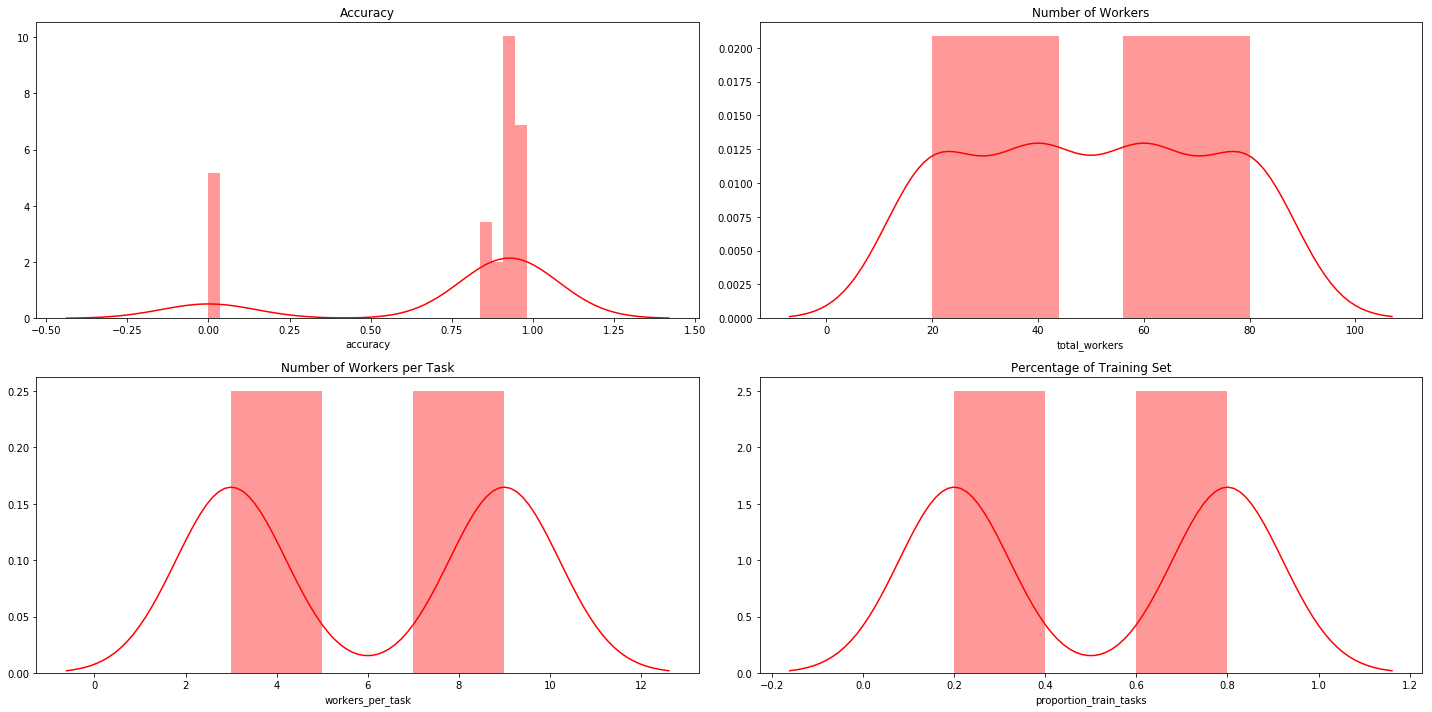

In [25]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(simulations['accuracy'], color="r")
plt.title('Accuracy')
plt.subplot(2,2,2)
sns.distplot(simulations['total_workers'], color="r")
plt.title('Number of Workers')
plt.subplot(2,2,3)
sns.distplot(simulations['workers_per_task'], color="r")
plt.title('Number of Workers per Task')
plt.subplot(2,2,4)
sns.distplot(simulations['proportion_train_tasks'], color="r")
plt.title('Percentage of Training Set')
plt.tight_layout()
#plt.savefig('../reports/test-retest_density_grid.png')

In [26]:
top_scenarios = simulations[simulations['accuracy'] >= simulations.quantile(.8)['accuracy']]

/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


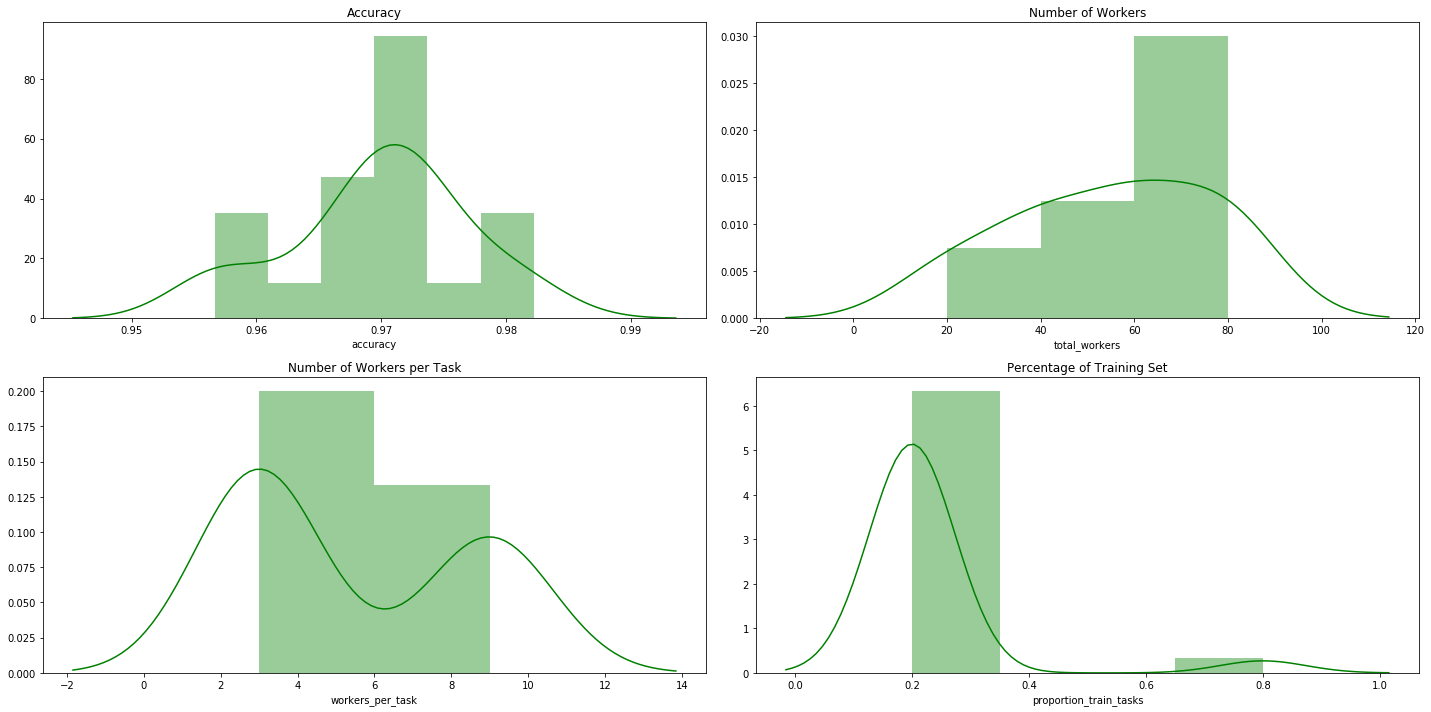

In [27]:
plt.figure(figsize=[20, 10])
plt.subplot(2,2,1)
sns.distplot(top_scenarios['accuracy'], color="g")
plt.title('Accuracy')
plt.subplot(2,2,2)
sns.distplot(top_scenarios['total_workers'], color="g")
plt.title('Number of Workers')
plt.subplot(2,2,3)
sns.distplot(top_scenarios['workers_per_task'], color="g")
plt.title('Number of Workers per Task')
plt.subplot(2,2,4)
sns.distplot(top_scenarios['proportion_train_tasks'], color="g")
plt.title('Percentage of Training Set')
plt.tight_layout()
#plt.savefig('../reports/test-retest_density_grid.png')